# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

There are total 61 columns in the dataset.

**Steps** :-
- Import the required libraries
- Reading and inspecting the dataset
- Data Analysis
- Demographic Analysis

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


##   Reading the data

- ###  Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
movies = pd.read_csv(r"C:\Users\VED\Downloads\UpGrad Assesments\IMDB Assignment\Movie+Assignment+Data.csv")
movies.head()


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


- ###   Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
# Check the number of rows and columns in the dataframe
movies.shape


(100, 62)

In [5]:
# Check the column-wise info of the dataframe
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
Title                     100 non-null object
title_year                100 non-null int64
budget                    100 non-null int64
Gross                     100 non-null int64
actor_1_name              100 non-null object
actor_2_name              100 non-null object
actor_3_name              100 non-null object
actor_1_facebook_likes    100 non-null int64
actor_2_facebook_likes    99 non-null float64
actor_3_facebook_likes    98 non-null float64
IMDb_rating               100 non-null float64
genre_1                   100 non-null object
genre_2                   97 non-null object
genre_3                   74 non-null object
MetaCritic                95 non-null float64
Runtime                   100 non-null int64
CVotes10                  100 non-null int64
CVotes09                  100 non-null int64
CVotes08                  100 non-null int64
CVotes07                  100 n

In [6]:
# Check the summary for the numeric columns 
movies.describe()


,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


##  Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###   Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first. For the analysis further it will get easy to draw insights.

In [7]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
movies['budget'] = movies['budget']/1000000
movies['Gross'] = movies['Gross']/1000000

-  ###   Let's Talk Profit!

In [8]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column
movies['Profit'] = movies['Gross']-movies['budget']
movies['Profit'].head()

0    121.101803
1    191.268248
2     39.738905
3     53.546139
4     38.695371
Name: Profit, dtype: float64

In [9]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'

movies.Profit.sort_values(ascending = False)

97    691.662225
11    403.279547
47    305.024263
32    294.645577
12    214.984497
8     198.130642
45    197.756197
1     191.268248
41    182.501645
18    181.454367
34    174.084951
19    163.130696
9     157.197282
98    146.347721
63    144.705587
55    133.031347
61    133.029270
27    132.568851
76    123.795342
16    123.001229
0     121.101803
33    120.430993
85    112.868837
68    111.088910
43    106.735396
13    104.360277
83     93.952327
51     91.519448
20     89.746958
44     87.775460
         ...    
78     20.887263
79     20.054909
59     18.043505
42     17.707116
60     16.875468
36     16.866727
5      15.007844
50     14.962878
38     12.515793
80     10.440971
95      9.792000
87      5.613460
96      5.114507
84      4.738570
29      3.629485
88      3.294553
67      2.556065
71      2.483154
73      0.329466
99     -4.776162
89     -8.674623
56    -11.096291
66    -11.348338
82    -12.247786
28    -13.594629
46    -28.505730
7     -59.192738
17    -77.8104

In [10]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)
movies['top10'] = movies.loc[0:9, 'Title']
movies['top10']

0                     La La Land
1                       Zootopia
2                           Lion
3                        Arrival
4          Manchester by the Sea
5             Hell or High Water
6                 Doctor Strange
7                        Tangled
8          The Dark Knight Rises
9     Captain America: Civil War
10                           NaN
11                           NaN
12                           NaN
13                           NaN
14                           NaN
15                           NaN
16                           NaN
17                           NaN
18                           NaN
19                           NaN
20                           NaN
21                           NaN
22                           NaN
23                           NaN
24                           NaN
25                           NaN
26                           NaN
27                           NaN
28                           NaN
29                           NaN
          

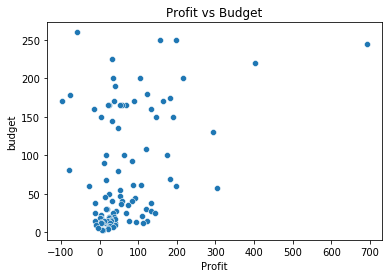

In [11]:
 #Plot profit vs budget
sns.scatterplot(movies['Profit'], movies['budget'])
plt.title('Profit vs Budget')
plt.show()

The dataset contains the 100 best performing movies from the year 2010 to 2016. However, the scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [12]:
#Find the movies with negative profit
movies[movies["Profit"] < 0]


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,top10
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738,Tangled
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499,NaN
22,Hugo,2011,170.0,73.820094,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,...,7.5,7.5,7.6,7.4,7.7,7.5,PG,USA,-96.179906,NaN
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594629,NaN
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848,NaN
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730,NaN
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291,NaN
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338,NaN
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786,NaN
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623,NaN


- ###  The General Audience and the Critics
    

In [13]:
# Change the scale of MetaCritic
movies['MetaCritic'] =  movies['MetaCritic']/10
movies['MetaCritic'].head()

0    9.3
1    7.8
2    6.9
3    8.1
4    9.6
Name: MetaCritic, dtype: float64

In [14]:
# Find the average ratings
movies['Avg_rating'] = (movies['MetaCritic']+movies['IMDb_rating'])/2
movies['Avg_rating'].head()

0    8.75
1    7.95
2    7.50
3    8.05
4    8.75
Name: Avg_rating, dtype: float64

In [15]:
#Sort in descending order of average rating
movies['Avg_rating'] = movies['Avg_rating'].sort_values(ascending=False)


In [16]:
# Find the movies with metacritic-Imdb rating < 0.5 and also with an average rating of >= 8 (sorted in descending order)
UniversalAcclaim = movies[(abs(movies['MetaCritic']-movies['IMDb_rating'])<0.5) & (movies['Avg_rating']>=8)]
UniversalAcclaim.sort_values(by='Avg_rating', ascending=False,inplace=True)
UniversalAcclaim.Avg_rating.head()

95    8.65
35    8.25
93    8.20
97    8.10
3     8.05
Name: Avg_rating, dtype: float64

 Can you spot a `Star Wars` movie in your final dataset?

- ###  Find the Most Popular Trios - I

In [17]:
# Write your code here
movies['Trio'] = movies[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']].sum(axis=1)
movies['Trio'].sort_values(ascending=False).head()

2     138800.0
27     79000.0
14     76000.0
4      74818.0
8      73000.0
Name: Trio, dtype: float64

- ### Find the Most Popular Trios - II

In [18]:
#Check Popular Trios
trios = movies[~(((movies["actor_1_facebook_likes"]/2 < movies["actor_2_facebook_likes"])|
         (movies["actor_1_facebook_likes"]/2 < movies["actor_3_facebook_likes"]))==True)|
         (((movies["actor_2_facebook_likes"]/2 < movies["actor_1_facebook_likes"])|
         (movies["actor_2_facebook_likes"]/2 < movies["actor_3_facebook_likes"]))==True)|
         (((movies["actor_3_facebook_likes"]/2 < movies["actor_2_facebook_likes"])|
          (movies["actor_3_facebook_likes"]/2 < movies["actor_1_facebook_likes"]))==True)]

In [19]:
trios.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,top10,Avg_rating,Trio
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.5,7.1,8.3,8.1,PG-13,USA,121.101803,La La Land,8.75,33000.0
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.6,8.0,8.0,PG,USA,191.268248,Zootopia,7.95,57800.0
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905,Lion,7.50,138800.0
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,Arrival,8.05,40300.0
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.1,7.9,7.8,R,USA,38.695371,Manchester by the Sea,8.75,74818.0


**Write your answers below.**

- **`No. of trios that satisfy the above condition:`** (3 trios)

- **`Most popular trio after applying the condition:`** (Leonardo DiCaprio	Tom Hardy	Joseph Gordon-Levitt)

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [20]:
# Your answer here (optional and not graded)



- ###  Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

Text(0.5,1,'Runtime')

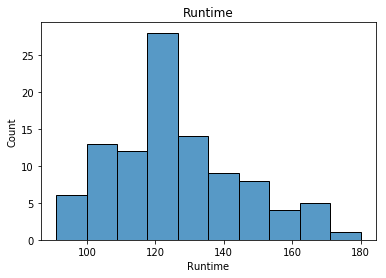

In [21]:
# Runtime histogram/density plot

sns.histplot(movies,x='Runtime')
plt.title('Runtime')

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### R-Rated Movies

In [22]:
# Write your code here
R = movies[movies['content_rating']=='R']

PopularR= R.sort_values(by='CVotesU18',ascending=False).head(10)

PopularR.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,top10,Avg_rating,Trio
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.3,8.1,7.9,R,USA,305.024263,NaN,7.25,17166.0
36,The Wolf of Wall Street,2013,100.0,116.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.5,7.8,8.1,8.1,R,USA,16.866727,NaN,7.85,44000.0
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.1,7.8,8.4,8.4,R,USA,62.804648,NaN,8.25,40265.0
29,Mad Max: Fury Road,2015,150.0,153.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,7.2,8.0,8.2,8.0,R,Australia,3.629485,NaN,8.55,36943.0
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.2,8.0,8.6,8.4,R,USA,9.792000,NaN,8.65,25505.0


 Are these kids watching `Deadpool` a lot?

Yes 

## Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Combine the Dataframe by Genres

In [23]:
# Create the dataframe df_by_genre
df_by_genre = movies[['genre_1','genre_2','genre_3','CVotes10','CVotes09','CVotes08','CVotes07','CVotes06','CVotes05','CVotes04','CVotes03','CVotes02','CVotes01','CVotesMale','CVotesFemale','CVotesU18','CVotesU18M','CVotesU18F','CVotes1829','CVotes1829M','CVotes1829F','CVotes3044','CVotes3044M','CVotes3044F','CVotes45A','CVotes45AM','CVotes45AF','CVotes1000','CVotesUS','CVotesnUS','VotesM','VotesF','VotesU18','VotesU18M','VotesU18F','Votes1829','Votes1829M','Votes1829F','Votes3044','Votes3044M','Votes3044F','Votes45A','Votes45AM','Votes45AF','Votes1000','VotesUS','VotesnUS']]
df_by_genre.head()

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
0,Comedy,Drama,Music,74245,71191,64640,38831,17377,8044,3998,...,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1
1,Animation,Adventure,Comedy,53626,70912,102352,57261,16719,4539,1467,...,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0
2,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,...,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0
3,Drama,Mystery,Sci-Fi,55533,87850,109536,65440,26913,10556,5057,...,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8


In [24]:
# Create a column cnt and initialize it to 1
df_by_genre['cnt'] = 1


In [25]:
# Group the movies by individual genres
df_by_g1 = df_by_genre.groupby('genre_1')
df_by_g1 = df_by_g1.sum()
df_by_g2 = df_by_genre.groupby('genre_2')
df_by_g2 = df_by_g2.sum()
df_by_g3 = df_by_genre.groupby('genre_3')
df_by_g3 = df_by_g3.sum()

In [26]:
# Add the grouped data frames and store it in a new data frame
add= df_by_g1.add(df_by_g2,fill_value=0)
df_add = add.add(df_by_g3, fill_value=0)
df_add.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0


In [27]:
# Extract genres with atleast 10 occurences
genre_top10 = df_add.loc[df_add.cnt>=10]
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0


In [28]:
# Take the mean for every column by dividing with cnt 
genre_top10 = genre_top10.div(genre_top10.cnt, axis='index')
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,1.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,1.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,1.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,1.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,1.0


In [29]:
# Rounding off the columns of Votes to two decimals
genre_top10 = genre_top10.round(decimals=2)
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.10,114433.19,150895.32,94262.13,34688.84,12693.03,5386.13,3064.65,2115.26,5524.10,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,1.0
Adventure,94596.29,105636.63,138482.32,86367.92,31896.71,11551.84,4817.63,2718.89,1835.18,4575.21,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,1.0
Animation,61960.18,72566.09,104837.64,65707.45,22825.09,7551.73,2792.55,1430.27,911.45,2290.27,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,1.0
Biography,47333.50,77867.11,123948.78,74054.44,23644.17,7702.67,2984.33,1639.44,1145.17,2849.83,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,1.0
Comedy,60157.22,77173.35,108993.52,69176.91,26099.43,9863.13,4237.78,2444.26,1712.65,3842.04,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,1.0


In [30]:
# Converting CVotes to int type
genre_top10[genre_top10.columns[0:27]] = genre_top10[genre_top10.columns[0:27]].astype(int)
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,1.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,1.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,1.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,1.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,1.0


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

Text(0.5,1,'Genres vs CNT')

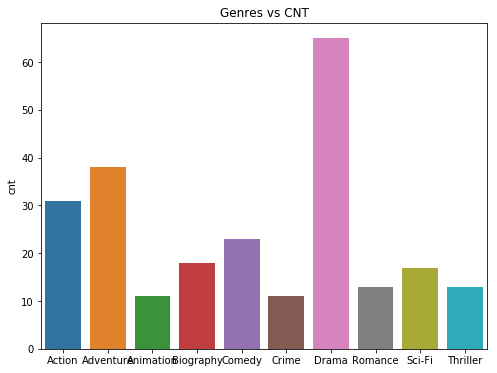

In [31]:
# Countplot for genres
cnt = df_add['cnt']
genre_top10['cnt'] = cnt
plt.figure(figsize=(8,6))
sns.barplot(x=genre_top10.index, y= genre_top10['cnt'])
plt.title("Genres vs CNT")

 Is the bar for `Drama` the tallest?   

-  ###  Gender and Genre

<Figure size 1152x864 with 0 Axes>

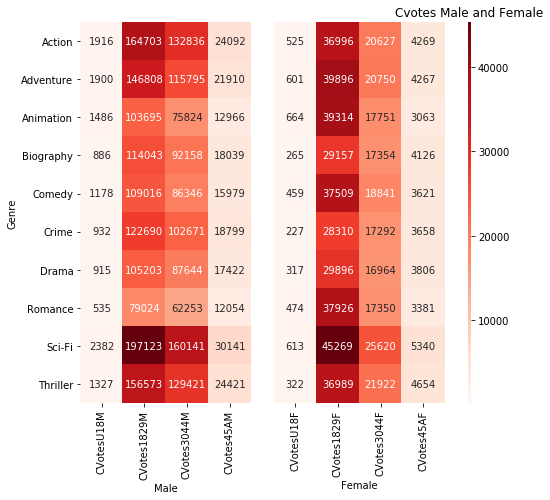

In [32]:
# 1st set of heat maps for CVotes-related columns
genderM = genre_top10[['CVotesU18M','CVotes1829M','CVotes3044M','CVotes45AM']]
genderF = genre_top10[['CVotesU18F','CVotes1829F','CVotes3044F','CVotes45AF']]

plt.figure(figsize=[16,12])
f,(ax1,ax2,axcb) = plt.subplots(1,3, gridspec_kw={"width_ratios":[4,4,0.08]}, figsize=(7,7))
ax1.get_shared_y_axes().join(ax1,ax2)
M1 = sns.heatmap(genderM, cmap='Reds', annot=True, fmt='d',cbar=False,ax=ax1) 
M1.set_xlabel('Male', fontsize=10)
M1.set_ylabel('Genre', fontsize=10)
F1 = sns.heatmap(genderF, cmap='Reds', annot=True, fmt='d',cbar_ax=axcb,ax=ax2)
F1.set_xlabel('Female', fontsize=10)
F1.set_ylabel(' ')
F1.set_yticks([])
plt.title("Cvotes Male and Female")
plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: 18-29 and 30-44 age group from males and females have voted more for movies.
- Inference 2: Most voted genre is sci-fi, 2nd) Action.
- Inference 3: In Female Animation is also a  good voted genre than in males.

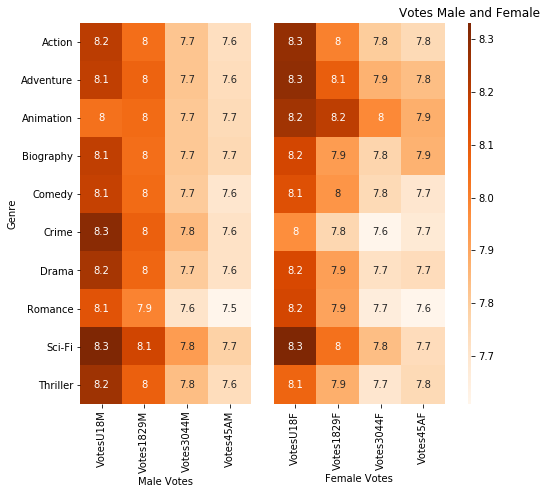

In [33]:
# 2nd set of heat maps for Votes-related columns
votesM = genre_top10[['VotesU18M','Votes1829M','Votes3044M','Votes45AM']]
votesF = genre_top10[['VotesU18F','Votes1829F','Votes3044F','Votes45AF']]

f,(ax1,ax2,axcb) = plt.subplots(1,3, gridspec_kw={"width_ratios":[4,4,0.08]}, figsize=(7,7))
ax1.get_shared_y_axes().join(ax1,ax2)
M1 = sns.heatmap(votesM, cmap='Oranges', annot=True,cbar=False,ax=ax1) 
M1.set_xlabel('Male Votes', fontsize=10)
M1.set_ylabel('Genre', fontsize=10)
F1 = sns.heatmap(votesF, cmap='Oranges', annot=True,cbar_ax=axcb,ax=ax2)
F1.set_xlabel('Female Votes', fontsize=10)
F1.set_ylabel(' ')
F1.set_yticks([])
plt.title("Votes Male and Female")
plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: Males have voted sci-fi and crime genre, Under 18 age group has voted more and 45-above voted less
- Inference 2: Females voted more for scifi and action,adventure, under18 age group voted more. 
- Inference 3: scifi is common genre and crime is more in male, also action and adventure is more in female.

-  ###  US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

In [34]:
# Creating IFUS column
movies['IFUS']= movies["Country"].apply(lambda x:'USA' if x=='USA' else 'non-USA')
movies['IFUS'].head()

0        USA
1        USA
2    non-USA
3        USA
4        USA
Name: IFUS, dtype: object

Text(0.5,1,'CVotes US vs nUS')

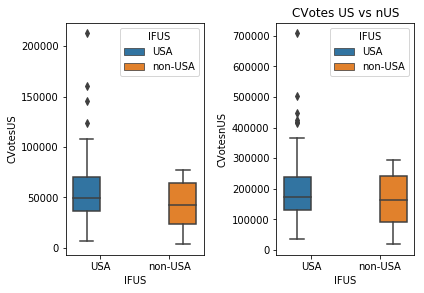

In [40]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)
fig, axes=plt.subplots(1,2)
sns.boxplot(  y="CVotesUS", x= "IFUS",data=movies,ax=axes[0],hue='IFUS')
sns.boxplot(  y="CVotesnUS", x= "IFUS",data=movies,ax=axes[1],hue='IFUS')
plt.tight_layout()
plt.title("CVotes US vs nUS")

**`Inferences:`** Write your two inferences/observations below:
- Inference 1:In the first plot CVotes have more USA people but having more outliers
- Inference 2: In the 2nd plot more non USA 

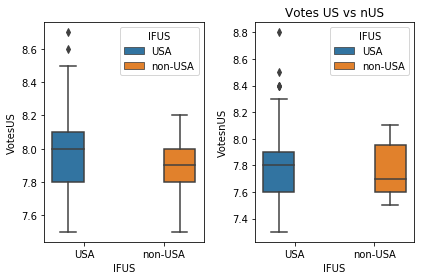

In [36]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
fig, axes=plt.subplots(1,2)
sns.boxplot(  y="VotesUS", x= "IFUS",data=movies,ax=axes[0],hue='IFUS')
sns.boxplot(  y="VotesnUS", x= "IFUS",data=movies,ax=axes[1],hue='IFUS')
plt.title("Votes US vs nUS")
plt.tight_layout()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1:More people from USA in the 1st plot
- Inference 2:

-  ###   Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

In [37]:
# Sorting by CVotes1000
genre_Cvotes1000 = genre_top10.sort_values(by='CVotes1000', ascending = False)
genre_Cvotes1000

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0


Text(0.5,1,'Genre vs CVotes')

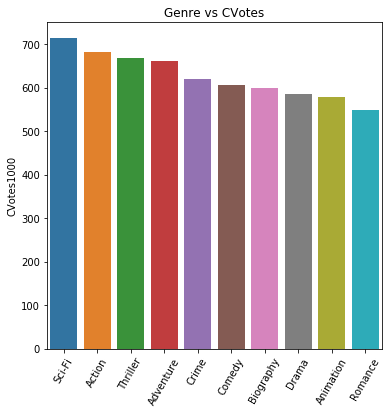

In [38]:
# Bar plot
plt.figure(figsize=(6,6))
sns.barplot(genre_Cvotes1000.index, genre_Cvotes1000.CVotes1000)
plt.xticks(rotation=60)
plt.title("Genre vs CVotes")

**`Inferences:`** :  As from the bar graph we can observe that scifi is the most voted genre and romance is less voted

The genre `Romance` seems to be most unpopular among the top 1000 voters.

.




.







###   Here we complete our IMDB Movie Analysis by drawing the intresting insights from the dataset.

**`Vedant D`**